<a href="https://colab.research.google.com/github/mcliff1/kaggle/blob/master/sandbox/probability%20windows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Future prediction windows

Some plots with future forecast based on mean and volatility

In [1]:
from datetime import datetime
from datetime import timedelta

from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='Solution may be inaccurate')



In [3]:

def calculate_confidence_interval(annual_return_, volatility_, p, years):
    """
    Calculate confidence intervals for an investment's future value.

    Parameters:
        annual_return (float): The annual return (e.g., 0.087 for 8.7%).
        volatility (float): The annual volatility (e.g., 0.092 for 9.2%).
        p (float): The confidence level as a decimal (e.g., 0.95 for 95%).
        years (int or float): The investment time horizon in years.

    Returns:
        tuple: A tuple with the lower and upper bounds of the confidence interval.
    """
    # Drift and standard deviation for log returns
    drift = (annual_return_ - 0.5 * volatility_**2) * years
    std_dev = volatility_ * np.sqrt(years)

    # Z-score for the desired confidence interval
    z = norm.ppf((1 + p) / 2)

    # Log range for the confidence interval
    log_lower = drift - z * std_dev
    log_upper = drift + z * std_dev

    # Convert log range back to the original scale
    lower_bound = np.exp(log_lower)
    upper_bound = np.exp(log_upper)

    return lower_bound, upper_bound

annual_return = 0.08
volatility = 0.08


# Calculate for 95% confidence interval
p95 = calculate_confidence_interval(annual_return, volatility, 0.95, 3)
print(f"95% Confidence Interval: {p95}")

# Calculate for 99% confidence interval
p99 = calculate_confidence_interval(annual_return, volatility, 0.99, 3)
print(f"99% Confidence Interval: {p99}")

# Calculate for 50% confidence interval
p50 = calculate_confidence_interval(annual_return, volatility, 0.50, 3)
print(f"50% Confidence Interval: {p50}")


95% Confidence Interval: (0.9596558233197051, 1.6519899246140501)
99% Confidence Interval: (0.8811588366060144, 1.7991554818058249)
50% Confidence Interval: (1.1467592935094346, 1.3824538071714445)


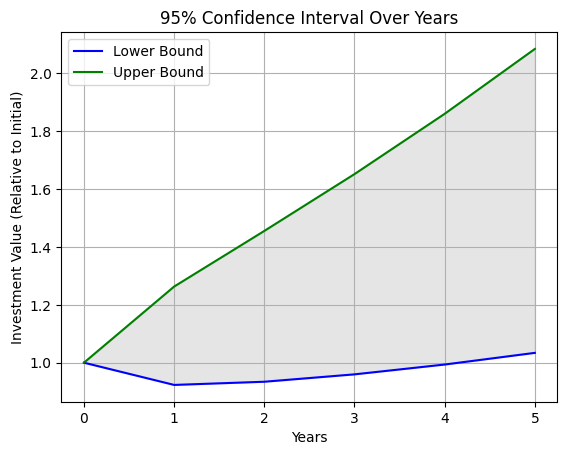

In [4]:
def plot_confidence_intervals_over_years(annual_return, volatility, p, start_year, end_year):
    """
    Plot confidence intervals over a range of years with a fixed confidence level.

    :param annual_return (float): The annual return.
    :param volatility (float): The annual volatility.
    :param p (float): The fixed confidence level as a decimal.
    :param start_year (int): The starting year for the range.
    :param end_year (int): The ending year for the range.
    """
    years = np.arange(start_year, end_year + 1)
    lower_bounds = []
    upper_bounds = []

    for year in years:
        lower, upper = calculate_confidence_interval(annual_return, volatility, p, year)
        lower_bounds.append(lower)
        upper_bounds.append(upper)

    #plt.figure(figsize=(10, 6))
    fig, ax = plt.subplots()

    plt.plot(years, lower_bounds, label="Lower Bound", color="blue")
    plt.plot(years, upper_bounds, label="Upper Bound", color="green")
    plt.fill_between(years, lower_bounds, upper_bounds, color="gray", alpha=0.2)
    plt.title(f"{int(p * 100)}% Confidence Interval Over Years")
    # ax.yaxis.set_major_formatter(FuncFormatter(millions))

    plt.xlabel("Years")
    plt.ylabel("Investment Value (Relative to Initial)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot confidence intervals for years 5 to 20
plot_confidence_intervals_over_years(annual_return, volatility, 0.95, 0, 5)
